<a href="https://colab.research.google.com/github/Gayathri20034/Data-Science-Analytics-Intern-Task/blob/main/Assisgnment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part A — Data preparation

1.Load both datasets and document:


In [5]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [7]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

# TRADES DATASET
print("TRADES SHAPE:", trades.shape)
print("\nTRADES COLUMNS:\n", trades.columns)
print("\nMissing Values (Trades):")
print(trades.isnull().sum())
print("\nDuplicate Rows (Trades):", trades.duplicated().sum())


# SENTIMENT DATASET
print("\n\nSENTIMENT SHAPE:", sentiment.shape)
print("\nSENTIMENT COLUMNS:\n", sentiment.columns)
print("\nMissing Values (Sentiment):")
print(sentiment.isnull().sum())
print("\nDuplicate Rows (Sentiment):", sentiment.duplicated().sum())



TRADES SHAPE: (211224, 16)

TRADES COLUMNS:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Missing Values (Trades):
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicate Rows (Trades): 0


SENTIMENT SHAPE: (2644, 4)

SENTIMENT COLUMNS:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Missing Values (Sentiment):
timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicate Rows (Sentiment): 0


2.Convert timestamps and align the datasets by date


In [9]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

trades['Date'] = trades['Timestamp IST'].dt.date
trades['Date'] = pd.to_datetime(trades['Date'])

sentiment['date'] = pd.to_datetime(sentiment['date'])
print(trades[['Timestamp IST','Date']].head())
print(sentiment.head())

        Timestamp IST       Date
0 2024-12-02 22:50:00 2024-12-02
1 2024-12-02 22:50:00 2024-12-02
2 2024-12-02 22:50:00 2024-12-02
3 2024-12-02 22:50:00 2024-12-02
4 2024-12-02 22:50:00 2024-12-02
    timestamp  value classification       date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02
2  1517635800     40           Fear 2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05


In [10]:
sentiment = sentiment[['date', 'classification']]

merged = trades.merge(
    sentiment,
    left_on='Date',
    right_on='date',
    how='left'
)

print("Missing sentiment rows after merge:",
      merged['classification'].isnull().sum())

Missing sentiment rows after merge: 6


In [17]:
# Drop rows with missing sentiment (very small count)
merged = merged.dropna(subset=['classification'])

print("Rows after dropping missing sentiment:",
      merged.shape)

Rows after dropping missing sentiment: (211218, 20)


3.Create the key metrics you will analyze

In [18]:
#Daily PnL per Trader
daily_pnl = (merged.groupby(['Account', 'Date'])['Closed PnL'].sum().reset_index(name='daily_pnl'))
daily_pnl.head()

,Account,Date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [19]:
#Win Rate per Trader
merged['win'] = merged['Closed PnL'] > 0

win_rate = (merged.groupby('Account')['win'].mean().reset_index(name='win_rate'))

win_rate.head()

,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [20]:
#Average Trade Size
avg_trade_size = (merged.groupby('Account')['Size USD'].mean() .reset_index(name='avg_trade_size'))

avg_trade_size.head()

,Account,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [21]:
#Trades per Day
trades_per_day = ( merged.groupby(['Account', 'Date']).size().reset_index(name='trade_count'))
trades_per_day.head()

,Account,Date,trade_count
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [22]:
#Long / Short Ratio
side_counts = ( merged .groupby(['Account', 'Side']).size().unstack(fill_value=0))
side_counts['long_ratio'] = (side_counts.get('BUY',0) /(side_counts.get('BUY',0) + side_counts.get('SELL',0)))
long_short_ratio = side_counts.reset_index()

long_short_ratio.head()

Side,Account,BUY,SELL,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1711,2107,0.448140
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3055,4225,0.419643
2,0x271b280974205ca63b716753467d5a371de622ab,1566,2243,0.411132
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,6699,6612,0.503268
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1179,2060,0.364001


Part B — Analysis

In [23]:
# Aggregate to daily trader level

daily_trader = (
    merged.groupby(['Account', 'Date', 'classification']).agg(
        daily_pnl=('Closed PnL', 'sum'),
        trades_per_day=('Closed PnL', 'count'),
        avg_trade_size=('Size USD', 'mean'),
        win_rate=('win', 'mean'),
        pnl_volatility=('Closed PnL', 'std')
    ).reset_index())

daily_trader.head()

,Account,Date,classification,daily_pnl,trades_per_day,avg_trade_size,win_rate,pnl_volatility
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,0.0,177,5089.718249,0.000000,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,0.0,68,7976.664412,0.000000,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,0.0,40,23734.500000,0.000000,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,-21227.0,12,28186.666667,0.000000,1526.178379
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,1603.1,27,17248.148148,0.444444,172.316814


Does Performance Differ Between Fear vs Greed?

In [24]:
daily_trader.groupby('classification')['daily_pnl'].mean()

,daily_pnl
classification,
Extreme Fear,4619.439053
Extreme Greed,5161.922644
Fear,5328.818161
Greed,3318.100730
Neutral,3438.618818


In [25]:
daily_trader.groupby('classification')['win_rate'].mean()

,win_rate
classification,
Extreme Fear,0.329659
Extreme Greed,0.386387
Fear,0.364033
Greed,0.343559
Neutral,0.355414


In [26]:
daily_trader.groupby('classification')['daily_pnl'].std()

,daily_pnl
classification,
Extreme Fear,29534.839183
Extreme Greed,27496.863832
Fear,31659.771538
Greed,30599.040173
Neutral,17447.863645


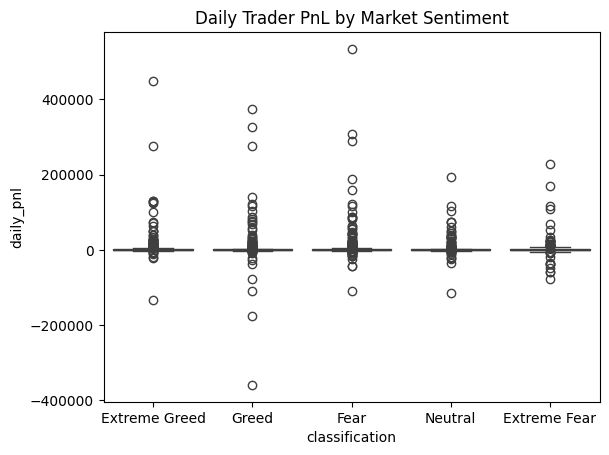

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=daily_trader,
            x='classification',
            y='daily_pnl')

plt.title("Daily Trader PnL by Market Sentiment")
plt.show()

Do Traders Change Behavior?

In [28]:
daily_trader.groupby('classification')['trades_per_day'].mean()

,trades_per_day
classification,
Extreme Fear,133.750000
Extreme Greed,76.030418
Fear,98.153968
Greed,77.628086
Neutral,100.228723


In [29]:
daily_trader.groupby('classification')['avg_trade_size'].mean()

,avg_trade_size
classification,
Extreme Fear,6773.464125
Extreme Greed,5371.637182
Fear,8975.928546
Greed,6427.866594
Neutral,6963.694861


In [30]:
daily_trader.groupby('classification')['win_rate'].mean()

,win_rate
classification,
Extreme Fear,0.329659
Extreme Greed,0.386387
Fear,0.364033
Greed,0.343559
Neutral,0.355414


Segment Traders

In [31]:
volatility_per_trader = (
    daily_trader
    .groupby('Account')['daily_pnl']
    .std()
)

threshold = volatility_per_trader.median()

daily_trader['risk_segment'] = daily_trader['Account'].map(
    lambda x: 'High Risk'
    if volatility_per_trader[x] > threshold
    else 'Low Risk'
)

In [32]:
daily_trader.groupby(['classification', 'risk_segment'])['daily_pnl'].mean()

classification  risk_segment
Extreme Fear    High Risk        8643.809296
                Low Risk          171.450889
Extreme Greed   High Risk       11971.736499
                Low Risk         2520.649196
Fear            High Risk       10804.185265
                Low Risk          287.474060
Greed           High Risk        6757.251531
                Low Risk         1199.721059
Neutral         High Risk        7418.510806
                Low Risk          554.109946
Name: daily_pnl, dtype: float64

In [33]:
trade_freq = (
    daily_trader
    .groupby('Account')['trades_per_day']
    .mean()
)

freq_threshold = trade_freq.median()

daily_trader['freq_segment'] = daily_trader['Account'].map(
    lambda x: 'Frequent'
    if trade_freq[x] > freq_threshold
    else 'Infrequent'
)

In [34]:
daily_trader.groupby(['classification','freq_segment'])['daily_pnl'].mean()

classification  freq_segment
Extreme Fear    Frequent        5406.205623
                Infrequent      3727.770274
Extreme Greed   Frequent        4340.279167
                Infrequent      5800.361832
Fear            Frequent        8672.944447
                Infrequent      2249.775057
Greed           Frequent        5494.049560
                Infrequent      1942.374895
Neutral         Frequent        4130.277361
                Infrequent      2891.879207
Name: daily_pnl, dtype: float64

In [35]:
overall_win = (
    daily_trader
    .groupby('Account')['win_rate']
    .mean()
)

daily_trader['consistency_segment'] = daily_trader['Account'].map(
    lambda x: 'Consistent'
    if overall_win[x] > 0.55
    else 'Inconsistent'
)

In [36]:
daily_trader.groupby(['classification','consistency_segment'])['daily_pnl'].mean()

classification  consistency_segment
Extreme Fear    Consistent             5134.567611
                Inconsistent           4602.822003
Extreme Greed   Consistent             4300.548067
                Inconsistent           5250.407663
Fear            Consistent             1898.625987
                Inconsistent           5476.475440
Greed           Consistent             2231.102191
                Inconsistent           3395.358477
Neutral         Consistent             -113.302455
                Inconsistent           3670.047116
Name: daily_pnl, dtype: float64

In [37]:
daily_trader.groupby('classification')['daily_pnl'].mean()

,daily_pnl
classification,
Extreme Fear,4619.439053
Extreme Greed,5161.922644
Fear,5328.818161
Greed,3318.100730
Neutral,3438.618818


Part C — “Actionable output”

In [39]:
#1.Volatility Exploitation Rule

def position_multiplier(row):
    if row['classification'] in ["Fear", "Extreme Fear", "Extreme Greed"]:
        if row['win_rate'] > 0.55:
            return 1.2   # increase by 20%
        else:
            return 1.0
    elif row['classification'] == "Greed":
        return 0.8       # reduce by 20%
    else:
        return 1.0

daily_trader['position_multiplier'] = daily_trader.apply(position_multiplier, axis=1)

daily_trader[['classification','win_rate','position_multiplier']].head()

,classification,win_rate,position_multiplier
0,Extreme Greed,0.000000,1.0
1,Extreme Greed,0.000000,1.0
2,Extreme Greed,0.000000,1.0
3,Extreme Greed,0.000000,1.0
4,Extreme Greed,0.444444,1.0


In [41]:
#2.Risk Moderation for Greed Periods

def leverage_adjustment(row):
    if row['classification'] == "Greed":
        if row['risk_segment'] == "High Risk":
            return 0.7   # reduce leverage to 70% (i.e., -30%)
        else:
            return 1.0
    else:
        return 1.0

daily_trader['leverage_multiplier'] = daily_trader.apply(leverage_adjustment, axis=1)

daily_trader[['classification','risk_segment','leverage_multiplier']].head()

,classification,risk_segment,leverage_multiplier
0,Extreme Greed,High Risk,1.0
1,Extreme Greed,High Risk,1.0
2,Extreme Greed,High Risk,1.0
3,Extreme Greed,High Risk,1.0
4,Extreme Greed,High Risk,1.0


In [42]:
def trade_limit(row):
    if row['classification'] == "Greed" and row['freq_segment'] == "Frequent":
        return min(row['trades_per_day'], 5)
    else:
        return row['trades_per_day']

daily_trader['adjusted_trades'] = daily_trader.apply(trade_limit, axis=1)

daily_trader[['classification','freq_segment','trades_per_day','adjusted_trades']].head()

,classification,freq_segment,trades_per_day,adjusted_trades
0,Extreme Greed,Frequent,177,177
1,Extreme Greed,Frequent,68,68
2,Extreme Greed,Frequent,40,40
3,Extreme Greed,Frequent,12,12
4,Extreme Greed,Frequent,27,27
